In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
"""
TODO
1. Import and load train and test data.
2. Plot some variables and its relation with the target for choose at least 4 models.
3. Select best variables.
4. Fit the models and make an intepretation of the outcomes.
5. Choose the best model based on the selected metrics
5. Validate with the test data.
"""

'\nTODO\n1. Import and load train and test data.\n2. Plot some variables and its relation with the target for choose at least 4 models.\n3. Select best variables.\n4. Fit the models and make an intepretation of the outcomes.\n5. Choose the best model based on the selected metrics\n5. Validate with the test data.\n'

# 1. Import and load

In [4]:
data_path = '../data/'
os.listdir(data_path)

['.DS_Store',
 'datos_musica_new.csv',
 'audio',
 '.gitignore',
 'spectrograms',
 'datos_musica_new_sa.csv']

In [5]:
df = pd.read_csv(data_path + 'datos_musica_new.csv')

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   t_archivo            1173 non-null   object 
 1   c_zero_cr            1173 non-null   int64  
 2   c_spectral_centroid  1173 non-null   float64
 3   c_spectral_bw        1173 non-null   float64
 4   c_spectral_rf        1173 non-null   float64
 5   c_croma              1173 non-null   float64
 6   c_norm_main_signal   1173 non-null   float64
 7   c_norm_amplitude_db  1173 non-null   float64
 8   c_mfcc_1             1173 non-null   float64
 9   c_mfcc_2             1173 non-null   float64
 10  c_mfcc_3             1173 non-null   float64
 11  c_mfcc_4             1173 non-null   float64
 12  c_mfcc_5             1173 non-null   float64
 13  c_mfcc_6             1173 non-null   float64
 14  c_mfcc_7             1173 non-null   float64
 15  c_mfcc_8             1173 non-null   f

# 2. Plot some variables and its relation with the target for choosing at least 4 models.

In [7]:
predictors = list(df.columns)[:-1]
target = list(df.columns).pop(list(df.columns).index('tgt'))
predictors, target

(['t_archivo',
  'c_zero_cr',
  'c_spectral_centroid',
  'c_spectral_bw',
  'c_spectral_rf',
  'c_croma',
  'c_norm_main_signal',
  'c_norm_amplitude_db',
  'c_mfcc_1',
  'c_mfcc_2',
  'c_mfcc_3',
  'c_mfcc_4',
  'c_mfcc_5',
  'c_mfcc_6',
  'c_mfcc_7',
  'c_mfcc_8',
  'c_mfcc_9',
  'c_mfcc_10',
  'c_mfcc_11',
  'c_mfcc_12',
  'c_mfcc_13',
  'c_mfcc_14',
  'c_mfcc_15',
  'c_mfcc_16',
  'c_mfcc_17',
  'c_mfcc_18',
  'c_mfcc_19',
  'c_mfcc_20',
  'c_bpm',
  'c_auto_c'],
 'tgt')

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
cont = [x for x in predictors if 'c_' in x]
cont.append('tgt')
cont

['c_zero_cr',
 'c_spectral_centroid',
 'c_spectral_bw',
 'c_spectral_rf',
 'c_croma',
 'c_norm_main_signal',
 'c_norm_amplitude_db',
 'c_mfcc_1',
 'c_mfcc_2',
 'c_mfcc_3',
 'c_mfcc_4',
 'c_mfcc_5',
 'c_mfcc_6',
 'c_mfcc_7',
 'c_mfcc_8',
 'c_mfcc_9',
 'c_mfcc_10',
 'c_mfcc_11',
 'c_mfcc_12',
 'c_mfcc_13',
 'c_mfcc_14',
 'c_mfcc_15',
 'c_mfcc_16',
 'c_mfcc_17',
 'c_mfcc_18',
 'c_mfcc_19',
 'c_mfcc_20',
 'c_bpm',
 'c_auto_c',
 'tgt']

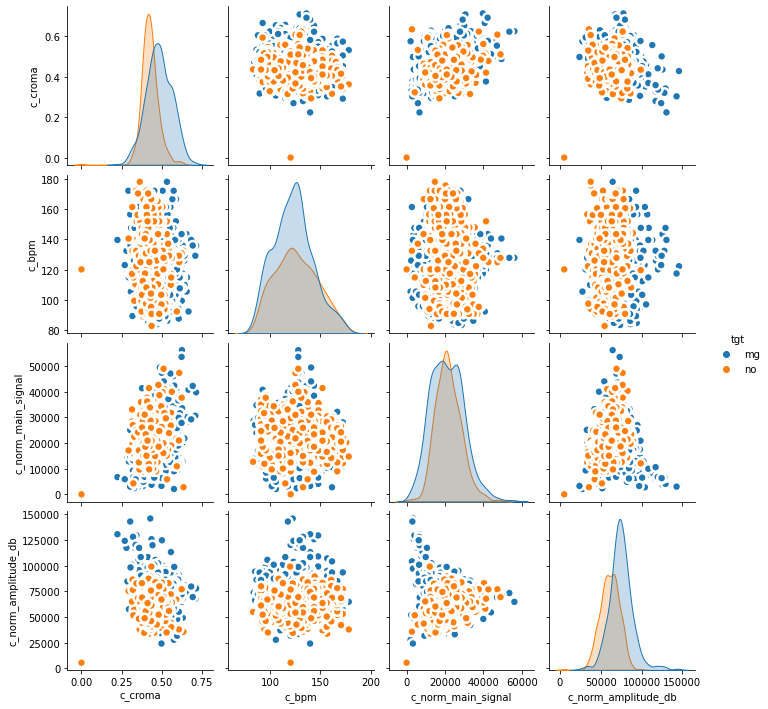

In [10]:
sns.pairplot(df[['c_croma', 'c_bpm', 'c_norm_main_signal', 'c_norm_amplitude_db', 'tgt']], kind="scatter", hue="tgt", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [11]:
df['tgt'].replace({'mg':1, 'no':0}, inplace=True)

# 3. Select best variables.

### Escalado de variables


Para este caso se utilizará minmax escaler, debido a la característica que tiene de manetener la segmentación en los datos y como se dijo, es algo que buscamos en términos de los problemas de clasificación.

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
predictors = [i for i in list(df.columns) if 'c_' in i]
predictors

['c_zero_cr',
 'c_spectral_centroid',
 'c_spectral_bw',
 'c_spectral_rf',
 'c_croma',
 'c_norm_main_signal',
 'c_norm_amplitude_db',
 'c_mfcc_1',
 'c_mfcc_2',
 'c_mfcc_3',
 'c_mfcc_4',
 'c_mfcc_5',
 'c_mfcc_6',
 'c_mfcc_7',
 'c_mfcc_8',
 'c_mfcc_9',
 'c_mfcc_10',
 'c_mfcc_11',
 'c_mfcc_12',
 'c_mfcc_13',
 'c_mfcc_14',
 'c_mfcc_15',
 'c_mfcc_16',
 'c_mfcc_17',
 'c_mfcc_18',
 'c_mfcc_19',
 'c_mfcc_20',
 'c_bpm',
 'c_auto_c']

In [69]:
scaler = MinMaxScaler()
mm_df = df.copy()
mm_df[predictors] = pd.DataFrame(scaler.fit_transform(mm_df[predictors]), columns=predictors)

In [70]:
mm_df.head()

,t_archivo,c_zero_cr,c_spectral_centroid,c_spectral_bw,c_spectral_rf,c_croma,c_norm_main_signal,c_norm_amplitude_db,c_mfcc_1,c_mfcc_2,...,c_mfcc_14,c_mfcc_15,c_mfcc_16,c_mfcc_17,c_mfcc_18,c_mfcc_19,c_mfcc_20,c_bpm,c_auto_c,tgt
0,crop_139ORACION.mp3,0.461538,0.691671,0.856943,0.799567,0.624903,0.484874,0.442076,0.935877,0.560123,...,0.573110,0.465173,0.383546,0.561971,0.327263,0.698667,0.325092,0.261249,0.768760,1
1,crop_08Seek&Destroy.mp3,0.179487,0.732777,0.769774,0.733351,0.731126,0.223710,0.533165,0.886322,0.513376,...,0.580185,0.339448,0.202707,0.416285,0.233565,0.614015,0.197380,0.596472,0.843389,1
2,crop_02Rollercoaster.mp3,0.358974,0.654888,0.806376,0.739129,0.826488,0.459915,0.521129,0.911962,0.636141,...,0.666334,0.457753,0.595504,0.620439,0.441783,0.739533,0.366978,0.154875,0.377498,1
3,crop_11BringEmBackAlive.mp3,0.102564,0.589786,0.758783,0.666030,0.670255,0.542270,0.473539,0.943539,0.625992,...,0.547489,0.324144,0.415986,0.535405,0.331673,0.634874,0.378521,0.486763,0.714016,1
4,crop_4-04BodomBeachTerror.mp3,0.000000,0.563808,0.641427,0.568304,0.853568,0.588552,0.497575,0.962963,0.650882,...,0.467868,0.490342,0.519040,0.586424,0.501406,0.603977,0.376899,0.637105,0.737586,1


In [71]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [72]:
len(predictors)

29

In [73]:
Xt = mm_df[predictors].copy()
yt = mm_df[target].copy()

In [74]:
kb = SelectKBest(k=15)
z = kb.fit_transform(Xt, yt)

In [75]:
filtro = kb.get_support()
var = np.array(Xt.columns)

In [76]:
final_predictors = list(var[filtro])
final_predictors

['c_croma',
 'c_norm_amplitude_db',
 'c_mfcc_3',
 'c_mfcc_4',
 'c_mfcc_5',
 'c_mfcc_6',
 'c_mfcc_7',
 'c_mfcc_8',
 'c_mfcc_10',
 'c_mfcc_11',
 'c_mfcc_12',
 'c_mfcc_14',
 'c_mfcc_16',
 'c_mfcc_18',
 'c_auto_c']

In [77]:
#Para evitar temas de alta dimensionalidad, sólo se trabajaran con las 10 mejores variables

#Revisamos la proporción de los datos
low_dimensionality = mm_df[final_predictors].copy()
mm_df[target].value_counts(), mm_df[target].value_counts(1)

(1    692
 0    481
 Name: tgt, dtype: int64,
 1    0.58994
 0    0.41006
 Name: tgt, dtype: float64)

A partir de este punto se trabajarán dos caminos, uno con el dataset de baja dimensionalidad y otro con todas las variables

In [78]:
# Train test split
from sklearn.model_selection import train_test_split

In [79]:
Xt, Xv, yt, yv = train_test_split(mm_df[predictors], mm_df[target], test_size=0.30, random_state=9238475)

In [80]:
Xt_ld, Xv_ld, yt, yv = train_test_split(low_dimensionality, df[target], test_size=0.30, random_state=9238475)

In [81]:
Xt.shape, Xt_ld.shape

((821, 29), (821, 15))

In [82]:
Xv.shape, Xv_ld.shape

((352, 29), (352, 15))

In [83]:
yt.shape, yv.shape

((821,), (352,))

# 4. Fit the models and make an intepretation of the outcomes.
Dada la naturaleza de los datos, se tomó la decisión de implementar un arreglo de clasificador votante, una red neuronal, random forest y sólo por comparar los resultados XGBoost y CatBoost. Para este caso nos interesa más un clasificador eficiente en términos de porcentaje de aciertos, por lo que los clasificadores de ensable son una opción interesante.

In [158]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


In [159]:
def metricas(modelo,Xt,Xv,yt,yv):
    print('Métricas:\n\n')
    print('+'*100)
    print('roc:\n')
    print(f'Xtrain: {roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1])}')
    print(f'Xvalidate: {roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1])}\n')
    print('+'*100)
    print('accuracy:\n')
    print(f'Xtrain: {accuracy_score(y_true=yt,y_pred=modelo.predict(Xt))}')
    print(f'Xvalidate: {accuracy_score(y_true=yv,y_pred=modelo.predict(Xv))}')
    print('+'*100)
    print('confusion matrix\n')
    print(f'{confusion_matrix(y_true=yt,y_pred = modelo.predict(Xt))}')
    print(f'{confusion_matrix(y_true=yv, y_pred = modelo.predict(Xv))}')
    print('+'*100)

In [160]:
def plot_confusion_matrix(df=df_confusion, title='Matriz de confusion', modelo=None ,cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.title(title + ' - ' +modelo)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

# Red Neuronal

In [161]:
MLPClassifier?

In [124]:
cerebro = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 400 ,300, 200, 100), max_iter=1000, verbose=2,
                      activation='relu', solver='sgd', learning_rate='adaptive')

In [125]:
cerebro.fit(Xt, yt)

Iteration 1, loss = 0.69876623
Iteration 2, loss = 0.69707686
Iteration 3, loss = 0.69505689
Iteration 4, loss = 0.69306479
Iteration 5, loss = 0.69146502
Iteration 6, loss = 0.68959133
Iteration 7, loss = 0.68817903
Iteration 8, loss = 0.68659439
Iteration 9, loss = 0.68534947
Iteration 10, loss = 0.68418088
Iteration 11, loss = 0.68325943
Iteration 12, loss = 0.68251665
Iteration 13, loss = 0.68198550
Iteration 14, loss = 0.68140265
Iteration 15, loss = 0.68098810
Iteration 16, loss = 0.68063025
Iteration 17, loss = 0.68025229
Iteration 18, loss = 0.67994477
Iteration 19, loss = 0.67955906
Iteration 20, loss = 0.67927610
Iteration 21, loss = 0.67903253
Iteration 22, loss = 0.67886296
Iteration 23, loss = 0.67872445
Iteration 24, loss = 0.67849782
Iteration 25, loss = 0.67825704
Iteration 26, loss = 0.67797494
Iteration 27, loss = 0.67779410
Iteration 28, loss = 0.67755856
Iteration 29, loss = 0.67740275
Iteration 30, loss = 0.67734155
Iteration 31, loss = 0.67716812
Iteration 32, los

Iteration 254, loss = 0.39823000
Iteration 255, loss = 0.39452915
Iteration 256, loss = 0.39089057
Iteration 257, loss = 0.39352939
Iteration 258, loss = 0.38784396
Iteration 259, loss = 0.38369015
Iteration 260, loss = 0.38098919
Iteration 261, loss = 0.37789148
Iteration 262, loss = 0.37736640
Iteration 263, loss = 0.37518797
Iteration 264, loss = 0.37138343
Iteration 265, loss = 0.37120079
Iteration 266, loss = 0.36938367
Iteration 267, loss = 0.36462579
Iteration 268, loss = 0.36093015
Iteration 269, loss = 0.36151841
Iteration 270, loss = 0.35736160
Iteration 271, loss = 0.35503622
Iteration 272, loss = 0.35365767
Iteration 273, loss = 0.35184080
Iteration 274, loss = 0.35086246
Iteration 275, loss = 0.35298305
Iteration 276, loss = 0.34636106
Iteration 277, loss = 0.34666186
Iteration 278, loss = 0.35238127
Iteration 279, loss = 0.34122793
Iteration 280, loss = 0.34152311
Iteration 281, loss = 0.34305469
Iteration 282, loss = 0.35414421
Iteration 283, loss = 0.34543459
Iteration 

Iteration 491, loss = 0.25310616
Iteration 492, loss = 0.25310621
Iteration 493, loss = 0.25310480
Iteration 494, loss = 0.25310449
Iteration 495, loss = 0.25310114
Iteration 496, loss = 0.25310269
Iteration 497, loss = 0.25310259
Iteration 498, loss = 0.25309950
Iteration 499, loss = 0.25309962
Iteration 500, loss = 0.25309908
Iteration 501, loss = 0.25310028
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.


MLPClassifier(hidden_layer_sizes=(100, 200, 300, 400, 300, 200, 100),
              learning_rate='adaptive', max_iter=1000, solver='sgd', verbose=2)

In [126]:
print(classification_report(yt, cerebro.predict(Xt)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       347
           1       0.92      0.91      0.91       474

    accuracy                           0.90       821
   macro avg       0.90      0.90      0.90       821
weighted avg       0.90      0.90      0.90       821



In [127]:
print(classification_report(yv, cerebro.predict(Xv)))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       134
           1       0.87      0.90      0.89       218

    accuracy                           0.86       352
   macro avg       0.85      0.84      0.85       352
weighted avg       0.86      0.86      0.86       352



In [144]:
metricas(cerebro, Xt, Xv, yt, yv)

Métricas:


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
roc:

Xtrain: 0.9596511387541191
Xvalidate: 0.9479323565657949

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
accuracy:

Xtrain: 0.9013398294762485
Xvalidate: 0.8579545454545454
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion matrix

[[311  36]
 [ 45 429]]
[[105  29]
 [ 21 197]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


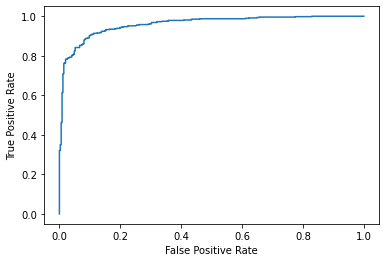

In [165]:
fpr, tpr, _ = metrics.roc_curve(yt, cerebro.predict_proba(Xt)[::,1])
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

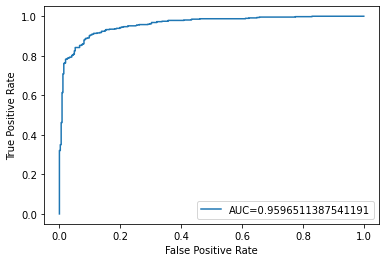

In [166]:
auc = metrics.roc_auc_score(yt, cerebro.predict_proba(Xt)[::,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [146]:
df_confusion = pd.crosstab(yt, cerebro.predict(Xt), rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted    0    1
Actual             
0          311   36
1           45  429


In [147]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1
Actual                       
0          0.896254  0.075949
1          0.129683  0.905063


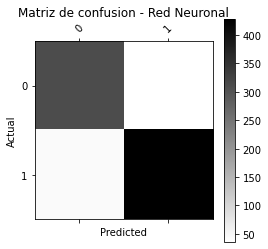

In [155]:
plot_confusion_matrix(df=df_confusion, modelo="Red Neuronal")

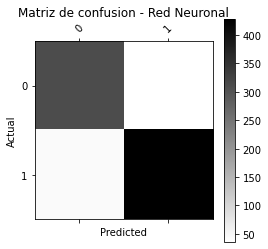

In [156]:
plot_confusion_matrix(df=df_conf_norm, modelo='Red Neuronal') 

# Red neuronal para data set reducido

In [187]:
cerebro = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 200, 100), max_iter=1000, verbose=2,
                      activation='relu', solver='sgd', learning_rate='adaptive')

In [188]:
cerebro.fit(Xt_ld, yt)

Iteration 1, loss = 0.71446554
Iteration 2, loss = 0.71120062
Iteration 3, loss = 0.70616706
Iteration 4, loss = 0.70063861
Iteration 5, loss = 0.69602104
Iteration 6, loss = 0.69127195
Iteration 7, loss = 0.68785054
Iteration 8, loss = 0.68469922
Iteration 9, loss = 0.68234430
Iteration 10, loss = 0.68051809
Iteration 11, loss = 0.67930832
Iteration 12, loss = 0.67848877
Iteration 13, loss = 0.67786461
Iteration 14, loss = 0.67743157
Iteration 15, loss = 0.67703918
Iteration 16, loss = 0.67674742
Iteration 17, loss = 0.67638784
Iteration 18, loss = 0.67604786
Iteration 19, loss = 0.67570465
Iteration 20, loss = 0.67537861
Iteration 21, loss = 0.67499496
Iteration 22, loss = 0.67472295
Iteration 23, loss = 0.67444304
Iteration 24, loss = 0.67413545
Iteration 25, loss = 0.67381538
Iteration 26, loss = 0.67352497
Iteration 27, loss = 0.67321536
Iteration 28, loss = 0.67293996
Iteration 29, loss = 0.67264910
Iteration 30, loss = 0.67234349
Iteration 31, loss = 0.67204550
Iteration 32, los

Iteration 254, loss = 0.39998320
Iteration 255, loss = 0.39687247
Iteration 256, loss = 0.39493108
Iteration 257, loss = 0.39423276
Iteration 258, loss = 0.39222999
Iteration 259, loss = 0.39161702
Iteration 260, loss = 0.38989322
Iteration 261, loss = 0.38918854
Iteration 262, loss = 0.38895067
Iteration 263, loss = 0.38620381
Iteration 264, loss = 0.38549172
Iteration 265, loss = 0.38649977
Iteration 266, loss = 0.38274147
Iteration 267, loss = 0.38281453
Iteration 268, loss = 0.38324328
Iteration 269, loss = 0.38119498
Iteration 270, loss = 0.38002871
Iteration 271, loss = 0.37785727
Iteration 272, loss = 0.37724741
Iteration 273, loss = 0.37580121
Iteration 274, loss = 0.37653413
Iteration 275, loss = 0.37444800
Iteration 276, loss = 0.37364743
Iteration 277, loss = 0.37244430
Iteration 278, loss = 0.37313192
Iteration 279, loss = 0.37182822
Iteration 280, loss = 0.37053418
Iteration 281, loss = 0.36920474
Iteration 282, loss = 0.37004818
Iteration 283, loss = 0.36897799
Iteration 

Iteration 497, loss = 0.32463117
Iteration 498, loss = 0.32462240
Iteration 499, loss = 0.32464089
Iteration 500, loss = 0.32460000
Iteration 501, loss = 0.32460297
Iteration 502, loss = 0.32460798
Iteration 503, loss = 0.32461398
Iteration 504, loss = 0.32461778
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 505, loss = 0.32461015
Iteration 506, loss = 0.32461571
Iteration 507, loss = 0.32461072
Iteration 508, loss = 0.32461089
Iteration 509, loss = 0.32461275
Iteration 510, loss = 0.32461230
Iteration 511, loss = 0.32461330
Iteration 512, loss = 0.32461495
Iteration 513, loss = 0.32461352
Iteration 514, loss = 0.32461801
Iteration 515, loss = 0.32461813
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 516, loss = 0.32461837
Iteration 517, loss = 0.32462124
Iteration 518, loss = 0.32462092
Iteration 519, loss = 0.32462103
Iteration 520

MLPClassifier(hidden_layer_sizes=(100, 200, 300, 200, 100),
              learning_rate='adaptive', max_iter=1000, solver='sgd', verbose=2)

In [191]:
print(classification_report(yt, cerebro.predict(Xt_ld)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       347
           1       0.89      0.86      0.88       474

    accuracy                           0.86       821
   macro avg       0.86      0.86      0.86       821
weighted avg       0.86      0.86      0.86       821



In [192]:
print(classification_report(yv, cerebro.predict(Xv_ld)))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       134
           1       0.86      0.88      0.87       218

    accuracy                           0.84       352
   macro avg       0.83      0.83      0.83       352
weighted avg       0.84      0.84      0.84       352



In [193]:
metricas(cerebro, Xt_ld, Xv_ld, yt, yv)

Métricas:


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
roc:

Xtrain: 0.934134048322572
Xvalidate: 0.9304395453923044

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
accuracy:

Xtrain: 0.8599269183922046
Xvalidate: 0.8409090909090909
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion matrix

[[298  49]
 [ 66 408]]
[[104  30]
 [ 26 192]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


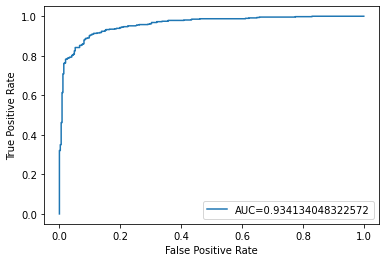

In [194]:
auc = metrics.roc_auc_score(yt, cerebro.predict_proba(Xt_ld)[::,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [195]:
df_confusion = pd.crosstab(yt, cerebro.predict(Xt_ld), rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted    0    1
Actual             
0          298   49
1           66  408


In [196]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1
Actual                       
0          0.858790  0.103376
1          0.190202  0.860759


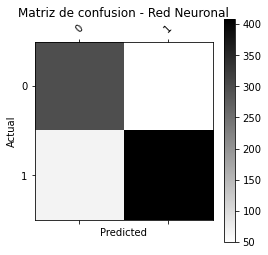

In [197]:
plot_confusion_matrix(df=df_confusion, modelo="Red Neuronal")

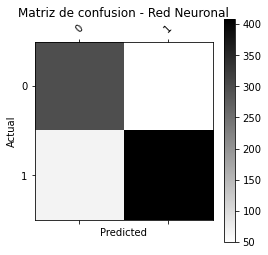

In [198]:
plot_confusion_matrix(df=df_conf_norm, modelo='Red Neuronal') 

# Ensamble clasificador votante

In [167]:
label = ['nb', 'lr', 'knn', 'tree', 'lda', 'rc']


models = [GaussianNB(), 
          LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean',n_jobs=8),
          DecisionTreeClassifier(max_depth=10),
          LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto'),
          RidgeClassifier(alpha=0.5)]


models = dict(zip(label, models))
resultados = {}

for l in label:
    
    print(f'Comenzando con el modelo: {l}...\n')
    aux_dict = {}
    clf = models.get(l)
    clf.fit(Xt, yt)
    
    print('Entrenamiento: \n')
    predictions = clf.predict(Xt)
    print(classification_report(yt, predictions))
    print('Matriz: \n')
    print(confusion_matrix(yt, predictions))
    
    train_score = recall_score(yt, predictions)
    
    print('Validación: \n')
    predictions = clf.predict(Xv)
    print(classification_report(yv, predictions))
    print('Matriz: \n')
    print(confusion_matrix(yv, predictions))    
    
    test_score = recall_score(yv, predictions)
    
    aux_dict['model'] = clf
    aux_dict['test_score'] = test_score
    aux_dict['train_score'] = train_score
    
    print(f'Train score: {train_score}.\n')
    print(f'Test score: {test_score}.\n')    
    
    resultados[l] = aux_dict
    print(f'Terminando con el modelo: {l}.\n')

Comenzando con el modelo: nb...

Entrenamiento: 

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       347
           1       0.89      0.82      0.85       474

    accuracy                           0.84       821
   macro avg       0.83      0.84      0.83       821
weighted avg       0.84      0.84      0.84       821

Matriz: 

[[299  48]
 [ 87 387]]
Validación: 

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       134
           1       0.90      0.85      0.88       218

    accuracy                           0.85       352
   macro avg       0.84      0.85      0.85       352
weighted avg       0.86      0.85      0.85       352

Matriz: 

[[114  20]
 [ 32 186]]
Train score: 0.8164556962025317.

Test score: 0.8532110091743119.

Terminando con el modelo: nb.

Comenzando con el modelo: lr...

Entrenamiento: 

              precision    recall  f1-score   support

           0 

In [236]:
Xt_n = Xt.copy()
Xt_n['estimated'] = ((resultados.get('nb').get('model').predict(Xt)*1) + 
               (resultados.get('lr').get('model').predict(Xt)*3) + 
               resultados.get('knn').get('model').predict(Xt)*2 + 
               resultados.get('tree').get('model').predict(Xt)*3 + 
               resultados.get('lda').get('model').predict(Xt)*2 + 
              resultados.get('rc').get('model').predict(Xt)*1)
                

n_votos = 6 # Número de votos de los modelos, para que sea considerado un evento
Xt_n['estimated_2'] = np.where(Xt_n['estimated']>=n_votos, 1, 0)#Regla de cuántos votos resultarían en que la clasificación sea positiva

Xt_n.head()

,c_zero_cr,c_spectral_centroid,c_spectral_bw,c_spectral_rf,c_croma,c_norm_main_signal,c_norm_amplitude_db,c_mfcc_1,c_mfcc_2,c_mfcc_3,...,c_mfcc_15,c_mfcc_16,c_mfcc_17,c_mfcc_18,c_mfcc_19,c_mfcc_20,c_bpm,c_auto_c,estimated,estimated_2
258,0.153846,0.580698,0.696881,0.631848,0.699045,0.453262,0.476006,0.895670,0.624278,0.380836,...,0.672182,0.491379,0.705177,0.427914,0.542540,0.465461,0.503673,0.661031,11,1
464,0.153846,0.553270,0.698322,0.593094,0.635036,0.184770,0.668782,0.831547,0.685703,0.406752,...,0.628063,0.367303,0.730681,0.486991,0.661510,0.391386,0.216146,0.603709,12,1
977,0.076923,0.594654,0.757159,0.622583,0.585974,0.421614,0.308132,0.915922,0.574340,0.458390,...,0.307963,0.532215,0.296519,0.510063,0.485170,0.454598,0.422330,0.636431,0,0
354,0.025641,0.531075,0.729132,0.629639,0.575467,0.346001,0.434077,0.870527,0.582091,0.554566,...,0.441763,0.371441,0.519517,0.332542,0.534172,0.333306,0.310274,0.759978,11,1
63,0.051282,0.502022,0.676342,0.569176,0.551906,0.277584,0.576033,0.851385,0.642479,0.553696,...,0.407753,0.232096,0.313693,0.306570,0.481901,0.321505,0.336420,0.703952,11,1


In [237]:
ypred = Xt_n['estimated_2'].copy()

In [238]:
print(classification_report(yt, ypred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       347
           1       0.93      0.93      0.93       474

    accuracy                           0.92       821
   macro avg       0.92      0.92      0.92       821
weighted avg       0.92      0.92      0.92       821



In [239]:
Xv_n = Xv.copy()
Xv_n['estimated'] = ((resultados.get('nb').get('model').predict(Xv)*1) + 
               (resultados.get('lr').get('model').predict(Xv)*3) + 
               resultados.get('knn').get('model').predict(Xv)*2 + 
               resultados.get('tree').get('model').predict(Xv)*3 + 
               resultados.get('lda').get('model').predict(Xv)*2 + 
              resultados.get('rc').get('model').predict(Xv)*1)
                

n_votos = 6 # Número de votos de los modelos, para que sea considerado un evento
Xv_n['estimated_2'] = np.where(Xv_n['estimated']>=n_votos, 1, 0)#Regla de cuántos votos resultarían en que la clasificación sea positiva

Xv_n.head()

,c_zero_cr,c_spectral_centroid,c_spectral_bw,c_spectral_rf,c_croma,c_norm_main_signal,c_norm_amplitude_db,c_mfcc_1,c_mfcc_2,c_mfcc_3,...,c_mfcc_15,c_mfcc_16,c_mfcc_17,c_mfcc_18,c_mfcc_19,c_mfcc_20,c_bpm,c_auto_c,estimated,estimated_2
1058,0.051282,0.565332,0.697803,0.587754,0.668773,0.317017,0.284907,0.843008,0.581523,0.551149,...,0.460885,0.607112,0.371255,0.535068,0.611454,0.424084,0.336420,0.472653,0,0
802,0.076923,0.432960,0.583681,0.480877,0.506090,0.172364,0.367952,0.798807,0.546101,0.563961,...,0.385278,0.515175,0.391173,0.248622,0.645883,0.346144,0.216146,0.579967,0,0
333,0.128205,0.532026,0.666114,0.571692,0.486154,0.153228,0.504179,0.816187,0.640129,0.426788,...,0.483125,0.289703,0.290372,0.383694,0.353668,0.327893,0.216146,0.798815,11,1
1019,0.435897,0.518432,0.714952,0.559976,0.532046,0.393807,0.417042,0.876276,0.617346,0.605739,...,0.459438,0.463630,0.522545,0.461086,0.575047,0.452426,0.135964,0.629205,0,0
689,0.025641,0.547060,0.729964,0.613719,0.623165,0.412457,0.414521,0.845716,0.540407,0.633007,...,0.420596,0.442384,0.588882,0.342362,0.546293,0.293466,0.486763,0.457323,3,0


In [240]:
ypred = Xv_n['estimated_2'].copy()

In [241]:
print(classification_report(yv, ypred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       134
           1       0.87      0.91      0.89       218

    accuracy                           0.86       352
   macro avg       0.86      0.84      0.85       352
weighted avg       0.86      0.86      0.86       352



Los resultados del clasificador votante dejan mucho que desear comparados con los de la red neuronal... por lo que no se tomará en cuenta

In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv